## Importing libraries and data

In [29]:
from potosnail import MachineLearning, DeepLearning, DataHelper, Evaluater
from sklearn.datasets import load_boston #loading boston housing data
import pandas as pd

# class instantiations
ml = MachineLearning()
dl = DeepLearning()
dh = DataHelper()
ev = Evaluater()

## Create DataFrame

In [9]:
df = pd.DataFrame(load_boston()['data'])
df.columns = list(load_boston()['feature_names'])
df['price'] = load_boston()['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Standard scaling data for better results

In [18]:
df2 = dh.ScaleData('standard', df, 'price')
df2['price'] = df['price']
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


## Creating train and validation sets

In [19]:
train, test = dh.HoldOut(df2) # using HoldOut function

## Using CompareModels function to pick the best model

In [20]:
ml.CompareModels(train, 'price', 'regression')

,Model,train_acc,test_acc
0,Lin,0.760248,0.683695
1,KNN,0.853744,0.689761
2,DT,1.000000,0.726291
3,RF,0.978223,0.759149
4,AB,0.911746,0.655549
5,GB,0.982332,0.797098
6,XGB,0.999999,0.761519
7,SVM,0.657390,0.574316


## Time to Optimize a model!!

Let's go with GB, GradientBoostedRegressor :)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'loss': ['ls', 'lad'], 'learning_rate': [0.01, 0.1]}
reg = ml.Optimize(GradientBoostingRegressor(), params, train, 'price')
reg

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.1s


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    2.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.0s finished


GradientBoostingRegressor()

## Evaluation

In [31]:
X = train.drop(['price'], axis='columns')
Xval = test.drop(['price'], axis='columns')
y = train['price']
yval = test['price']

reg.fit(X, y)

ev.EvaluateRegressor(reg, X, Xval, y, yval)

(    predicted  actual     error     %error
 0   21.424028    22.4  0.975972   4.357018
 1   35.359125    35.4  0.040875   0.115466
 2   21.964439    24.3  2.335561   9.611362
 3   16.331096    13.1  3.231096   0.802151
 4   29.064148    26.6  2.464148   0.915217
 5   18.090452    19.1  1.009548   5.285590
 6   16.026740    15.2  0.826740   0.948415
 7   29.551693    26.7  2.851693   0.903502
 8   15.086581    11.8  3.286581   0.782152
 9   35.505273    33.8  1.705273   0.951971
 10  21.821389    22.0  0.178611   0.811868
 11  13.807309    14.5  0.692691   4.777176
 12  27.004554    23.9  3.104554   0.885036
 13  26.287001    22.0  4.287001   0.836916
 14  11.614508    11.0  0.614508   0.947091
 15  35.151346    32.9  2.251346   0.935953
 16  25.374251    25.0  0.374251   0.985251
 17  26.110782    24.8  1.310782   0.949799
 18  27.337310    27.5  0.162690   0.591599
 19  17.579095    16.7  0.879095   0.949992
 20  22.891648    24.6  1.708352   6.944520
 21  19.347614    19.6  0.252386

RMSE is 5.92, accuracy is 91.89% !

This performance is good but let's use VifIt to check for multicolinearity.

In [33]:
dh.VifIt(X)

0     1.802831
1     2.192451
2     3.776351
3     1.084319
4     4.333929
5     2.061190
6     2.982612
7     3.835924
8     7.035938
9     8.359584
10    1.719462
11    1.340606
12    3.012541
dtype: float64

## We may do better without 'RAD' and 'Tax'

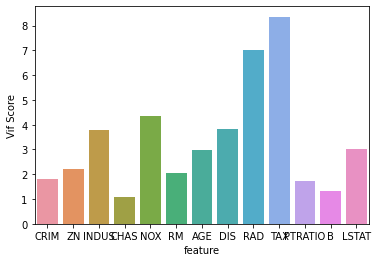

In [37]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.barplot(list(load_boston()['feature_names']), list(dh.VifIt(X)))
plt.xlabel('feature')   
plt.ylabel('Vif Score')
plt.show()

## Deep Learning approach

X and y will be changed because deep learning models take in np.arrays rather than dataframes

In [38]:
X = load_boston()['data']
y = load_boston()['target']

The following can also be done with DeepLearning().FastNN(), just be sure to set task to 'regression' and output_dim to 1

In [41]:
nodes = 64 #first layer will have 64 nodes
activation = 'relu'
regularizer = 'L1' #used to prevent overfitting in neural networks
stacking = True #our second layer will also have 64 nodes
dropout = False # another solution to overfitting
nlayers = 4 #the neural network will have 4 layers
closer = False
loss = 'mae' #we will use Mean Absolute Error loss function
optimizer = 'rmsprop' #we will use Root Mean Squared Backpropagation for out optimization function
y_col = 'price' #this parameter isn't actually used but CollectPreformance needs functions to take in 10 arguments
model = dl.DeepTabularRegression(nodes, activation, regularizer, stacking, dropout, nlayers, closer, loss, optimizer, y_col)

In [42]:
history = model.fit(X, y, batch_size=32, epochs=75, validation_split=0.2)

Epoch 1/75
13/13 [==============================] - 1s 15ms/step - loss: 16.6544 - val_loss: 7.7158
Epoch 2/75
13/13 [==============================] - 0s 4ms/step - loss: 7.8159 - val_loss: 7.2639
Epoch 3/75
13/13 [==============================] - 0s 3ms/step - loss: 7.4678 - val_loss: 8.0118
Epoch 4/75
13/13 [==============================] - 0s 3ms/step - loss: 6.7591 - val_loss: 7.1507
Epoch 5/75
13/13 [==============================] - 0s 3ms/step - loss: 6.5857 - val_loss: 5.8290
Epoch 6/75
13/13 [==============================] - 0s 3ms/step - loss: 6.9502 - val_loss: 10.5306
Epoch 7/75
13/13 [==============================] - 0s 4ms/step - loss: 6.8525 - val_loss: 11.8296
Epoch 8/75
13/13 [==============================] - 0s 4ms/step - loss: 6.4596 - val_loss: 7.2314
Epoch 9/75
13/13 [==============================] - 0s 3ms/step - loss: 6.6155 - val_loss: 9.5532
Epoch 10/75
13/13 [==============================] - 0s 3ms/step - loss: 7.2055 - val_loss: 10.8348
Epoch 11/75
13

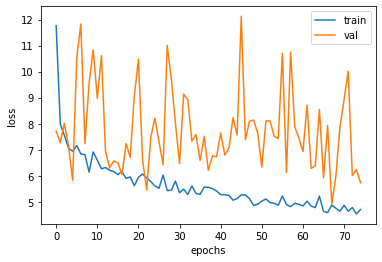

In [43]:
ev.ViewLoss(history, 75)